# Code General

This notebook walks you through how to train a baseline Random Forest model using TensorFlow Decision Forests on the Spaceship Titanic dataset made available for this competition.

Roughly, the code will look as follows:

--------------------------------------------
import os
for dirname,_,filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf

dataset = pd.read_csv('./train.csv')
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(
        dataset, label = 'my_label')
    
model = tfdf.kears.RandomForestModel()
model_fit(tf_dataset)

print(model.summary())

--------------------------------------------

# Environment and CWD Checking

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname,_,filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./test.csv
./Spaceship Titanic with TFDF.ipynb
./train.csv
./sample_submission.csv


In [2]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.15.0
TensorFlow Decision Forests v1.8.1


# Load the Dataset

In [3]:
# Load a dataset into a Pandas DataFrame
dataset_df = pd.read_csv('./train.csv')
print(f'Full train dataset shape is{dataset_df.shape}')

Full train dataset shape is(8693, 14)


In [4]:
#display the first 5 examples
dataset_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploration of the dataset

In [5]:
dataset_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Bar chart for lable_column: Transported

<Axes: >

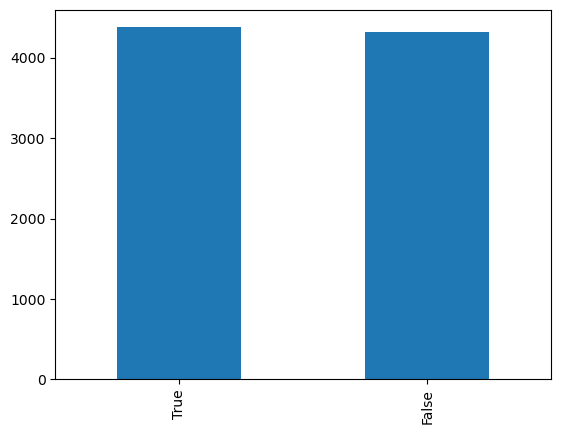

In [7]:
plot_df = dataset_df.Transported.value_counts()
plot_df.plot(kind="bar")

# Numerical data distribution

Let us plot all the numerical columns and their value counts:

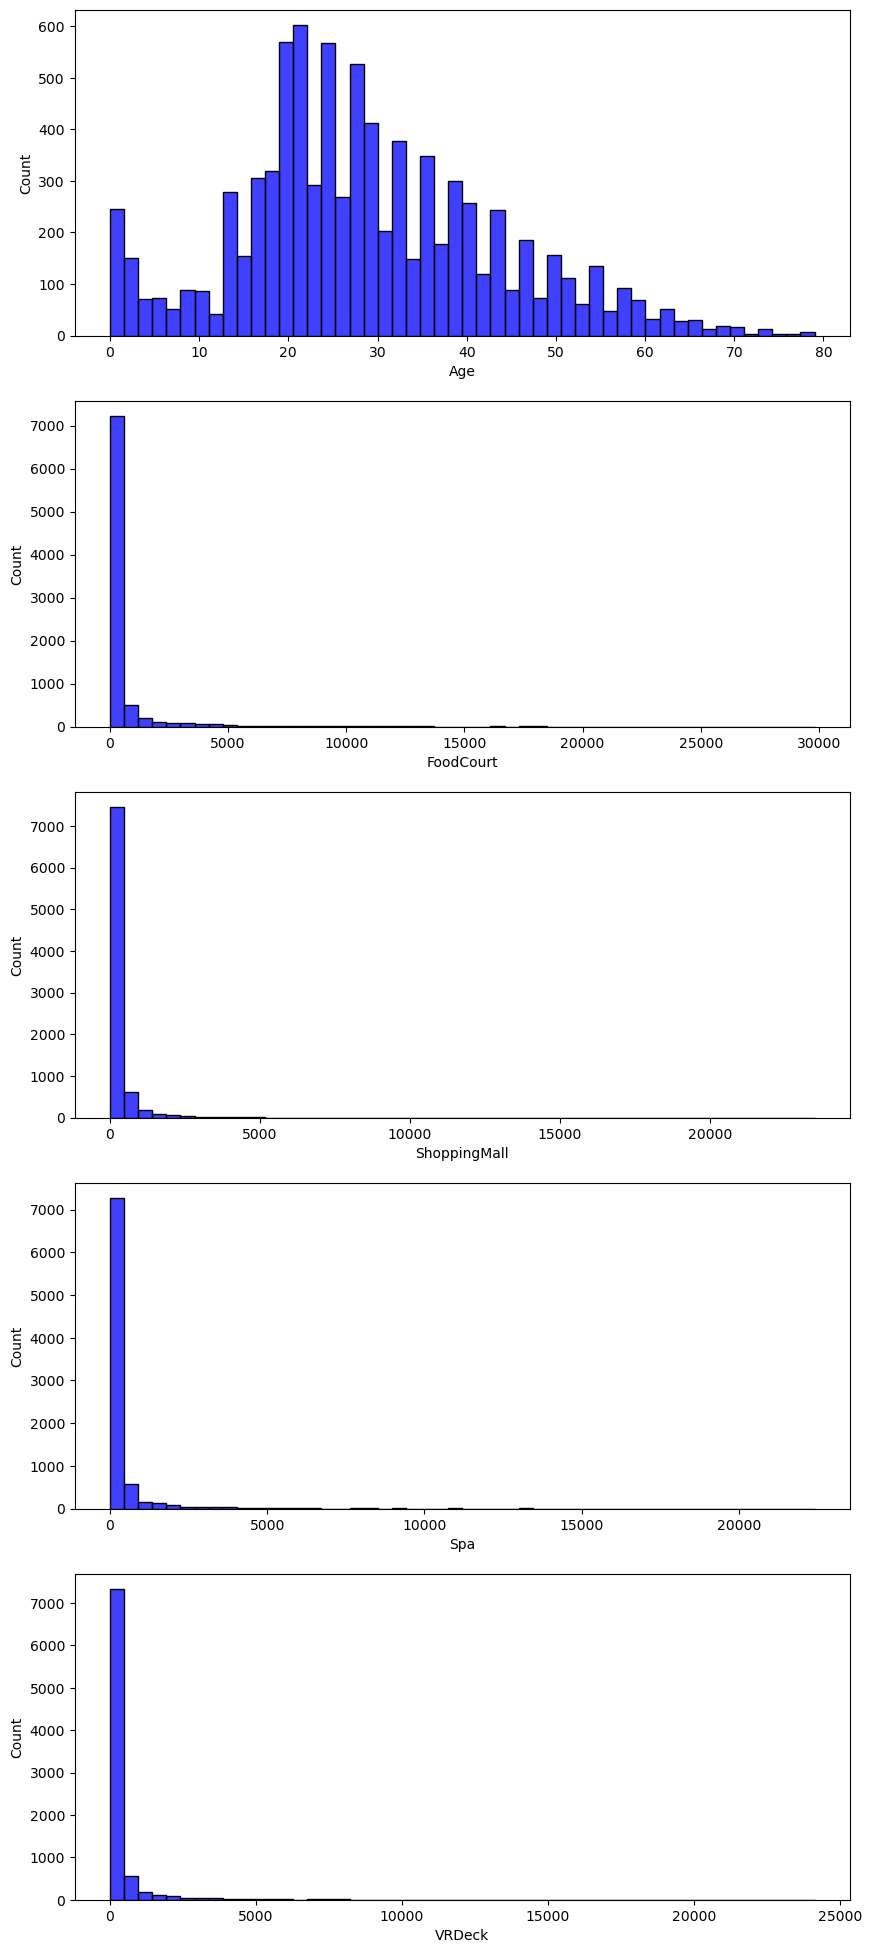

In [8]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(dataset_df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(dataset_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(dataset_df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(dataset_df['VRDeck'], color='b', bins=50, ax=ax[4]);

# Prepare the dataset(Feature Engineering)

In [10]:
dataset_df = dataset_df.drop(['PassengerId',"Name"], axis=1)
dataset_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [12]:
dataset_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

This dataset contains a mix of numeric, categorical and missing features. 【**TF-DF supports all these feature types natively, and no preprocessing is required**.】

But this datatset also has boolean fields with missing values. 【**TF-DF doesn't support boolean fields yet**】. So we need to convert those fields into int. To account for the missing values in the boolean fields, we will replace them with zero.

In this notebook, we will replace null value entries with zero for numerical columns as well and only let TF-DF handle the missing values in categorical columns.

Note: You can choose to let TF-DF handle missing values in numerical columns if need be.

In [13]:
dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = dataset_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
dataset_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [15]:
label = 'Transported'
dataset_df[label] = dataset_df[label].astype(int)
dataset_df['VIP'] = dataset_df['VIP'].astype(int)
dataset_df['CryoSleep'] = dataset_df['CryoSleep'].astype(int)

In [18]:
dataset_df[["Deck","Cabin_num","Side"]] = \
dataset_df["Cabin"].str.split('/',expand=True) 
# expand=True: This parameter is used to split the string into separate columns. 
#If expand=True, the split strings will expand out into separate columns. 
#If expand=False (the default), the split strings will be returned in a Series or DataFrame of lists.
dataset_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P
8689,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S
8690,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S
8691,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S


In [23]:
try:
    dataset_df = dataset_df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

Field does not exist


In [24]:
dataset_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


Now let us split the dataset into training and testing datasets:

In [36]:
from sklearn.model_selection import train_test_split

train_ds_pd, valid_ds_pd = train_test_split(dataset_df, test_size=0.20)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6954 examples in training, 1739 examples in testing.


There's one more step required before we can train the model. We need to convert the datatset from Pandas format (`pd.DataFrame`) into TensorFlow Datasets format (`tf.data.Dataset`).

**[TensorFlow Datasets](https://www.tensorflow.org/datasets/overview) is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.**

In [37]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

# Select a Model

There are several tree-based models for you to choose from.

* RandomForestModel
* GradientBoostedTreesModel
* CartModel
* DistributedGradientBoostedTreesModel

To start, we'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.

We can list the all the available models in TensorFlow Decision Forests using the following code:

In [38]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

# Configure the model

TensorFlow Decision Forests provides good defaults for you (e.g. the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time). If you would like to configure the learning algorithm, you will find many options you can explore to get the highest possible accuracy.

You can select a template and/or set parameters as follows:

```rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")```

Read more [here](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel).

# Create a Random Forest

Today, we will use the defaults to create the Random Forest Model. By default the model is set to train for a classification task.

In [39]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"]) # Optional, you can use this to include a list of eval metrics

Use /var/folders/k0/sqlrb6tx7w77mv29j7333kyh0000gq/T/tmpdxc22plt as temporary training directory


# Train the model

We will train the model using a one-liner.

Note: you may see a warning about Autograph. You can safely ignore this, it will be fixed in the next release.

In [44]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.072056. Found 6954 examples.
Training model...


[INFO 23-12-29 19:43:20.2100 CST kernel.cc:1233] Loading model from path /var/folders/k0/sqlrb6tx7w77mv29j7333kyh0000gq/T/tmpdxc22plt/model/ with prefix 6d6b986694654e31


Model trained in 0:00:33.118978
Compiling model...


[INFO 23-12-29 19:43:20.7451 CST decision_forest.cc:660] Model loaded with 300 root(s), 232048 node(s), and 13 input feature(s).
[INFO 23-12-29 19:43:20.7451 CST abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 23-12-29 19:43:20.7451 CST kernel.cc:1061] Use fast generic engine


Model compiled.


# Visualize the model
One benefit of tree-based models is that we can easily visualize them. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [48]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

Attached From Tutorial Website
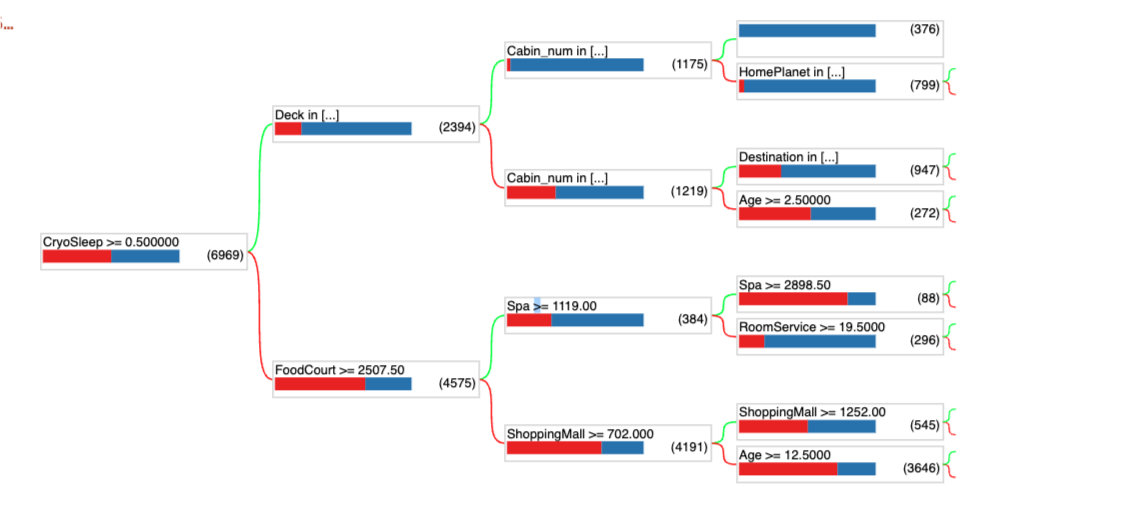

# Evaluate the model on the Out of bag (OOB) data and the validation dataset

Before training the dataset we have manually seperated 20% of the dataset for validation named as `valid_ds`.

We can also **use Out of bag (OOB) score to validate our RandomForestModel.**
To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB).
OOB score is computed on the OOB data.

Read more about OOB data [here](https://developers.google.com/machine-learning/decision-forests/out-of-bag).

The training logs show the accuracy evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

Note: Larger values are better for this hyperparameter.

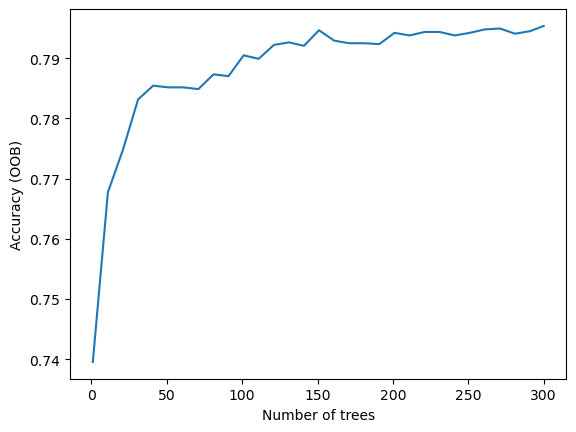

In [51]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],[log.evaluation.accuracy for log in logs])
plt.xlabel('Number of trees')
plt.ylabel("Accuracy (OOB)")
plt.show()

In [52]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6954, accuracy=0.7953695714696577, loss=0.5542951042318986, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

Now, let us run an evaluation using the validation dataset.

In [53]:
evaluation = rf.evaluate(x=valid_ds
                        ,return_dict=True)
for name, value in evaluation.items():
    print(f"{name}:{value:.4f}")

2/2 [==============================] - 1s 55ms/step - loss: 0.0000e+00 - accuracy: 0.7999
loss:0.0000
accuracy:0.7999


# Variable importances

Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests.
Let us list the available `Variable Importances` for Decision Trees:

In [54]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


As an example, let us display the important features for the Variable Importance `NUM_AS_ROOT`.

The larger the importance score for `NUM_AS_ROOT`, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.



In [55]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 125.0),
 ("RoomService" (1; #7), 67.0),
 ("Spa" (1; #10), 55.0),
 ("VRDeck" (1; #12), 24.0),
 ("ShoppingMall" (1; #8), 17.0),
 ("FoodCourt" (1; #5), 7.0),
 ("Deck" (4; #3), 2.0),
 ("HomePlanet" (4; #6), 2.0),
 ("Age" (1; #0), 1.0)]

## GPT Explanation for Variable Importances
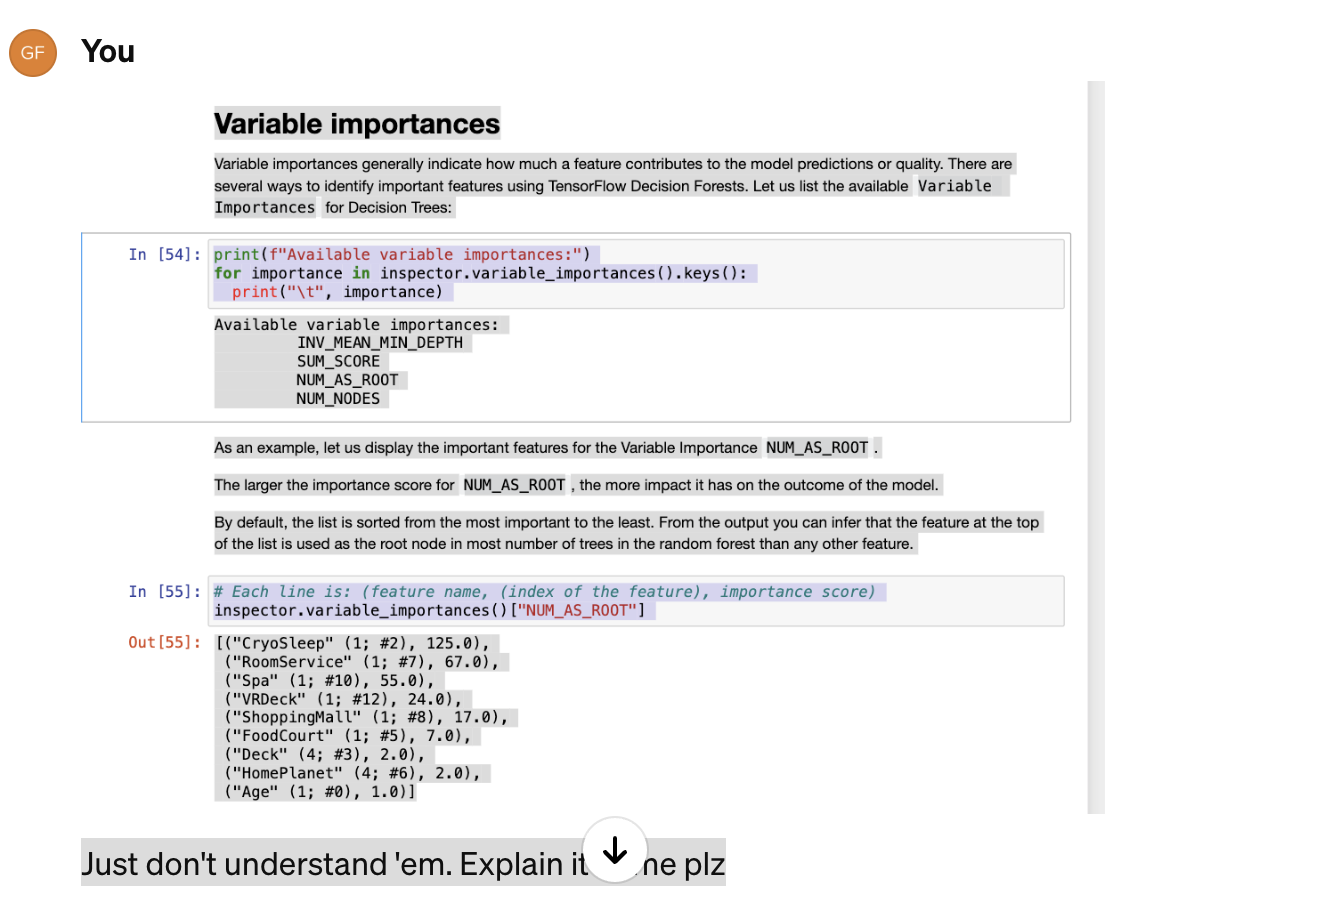
### 1. What Are Variable Importances?

Variable importances are metrics that indicate how much each feature contributes to the model's predictions. They help in understanding which features are most influential in determining the model's output.
### 2. Types of Variable Importances:

* The screenshot lists several types of variable importances provided by TFDF:
    * INV_MEAN_MIN_DEPTH: The inverse of the average minimum depth of a feature used as a decision node across all trees. A lower depth implies higher importance.
    * SUM_SCORE: Likely a sum of the improvement to the model's accuracy brought by each feature.
    * NUM_AS_ROOT: The number of times a feature is used as the root node across all trees in the forest.
    * NUM_NODES: The number of times a feature is used to split data in all nodes across the forest, not just the root.
### 3. Displaying Important Features:

The text suggests using the 'NUM_AS_ROOT' importance type to display features. This metric reflects the number of times a feature is used as the root node in the forest's trees. The root node is the first decision point in each tree, so if a feature is frequently used as the root, it is often one of the most informative features.
### 4. Code and Output Explanation:

* inspector.variable_importances()['NUM_AS_ROOT']: This line of code is accessing the NUM_AS_ROOT importance scores from the model inspector.
* The output is a list of tuples, with each tuple containing:
    * The feature name (e.g., "CryoSleep").
    * A pair of values where the first is the feature's index and the second is the importance score (e.g., (1; #2), 125.0).
    * The importance score reflects the count of how often the feature is used as the root node in the decision trees.
    * The feature "CryoSleep" has the highest importance score (125.0), making it the most used root feature, which suggests it's a very significant predictor in the model.
### Understanding the Output
* From the output, it can be inferred that the feature "CryoSleep" is the most important for this model, as it is used as the root node more often than any other feature.
* The #2 in (1; #2) denotes the feature's index in the internal feature list used by the model, which can be useful for reference.
* The numerical value following the feature index is the importance score, with a higher number indicating higher importance.
* **The list is sorted from the most important feature to the least important as indicated by the NUM_AS_ROOT metric.**

This information can be used to gain insights into the decision-making process of the model and can inform feature selection for model refinement or interpretation of model predictions.